<a href="https://colab.research.google.com/github/Kousikdutta1/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Kousik_Dutta_Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

###**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##**Introduction**

Bike rentals have become very popular in recent years, and it seems people are using it more often. With relatively cheaper rates and ease of pickup and drop at own convenience is what making this business boom.

Here I will try to implement various machine learning algorithm to predict this regression problem. The content of the notebook includes - 

  * **Exploratory data analysis**: In this section I will work on various features of the dataset and by using different visualization technique I will establish relationships among them.

  * **Data Wrangling**: In this section I will try to modify our dataset, handle missing values, outliers, form new columns, convert data types etc.

  * **Splitting the dataset and Standardization**: Here I will split the dataset into train and test sets and apply standardization method.  

  * **Comparison between different models**: Here I will use some Machine Learning algorithms such as Linear regression, Decision tree, Random forest, XGBoost, Gradient Boosting Technique and also check the performance using different evaluation metrics.

  * **Model Explainability**: In this section we will see what goes on inside the model we built.
  * **Conclusion**: Finally, I will land on some insights from our experiment and frame all the observations made during the analysis.



##**Data Preparation**

**Let's Start Our Journey by Importing and Inspecting the Dataset**

In [1]:
# Importing Required Libraries for our analysis 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To avoid unnecessary warnings, let's import warnings also
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Let's mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Let's define url path of the dataset

path = '/content/drive/MyDrive/Colab Notebooks/Seoul Bike Sharing Demand Prediction - Kousik Dutta/SeoulBikeData.csv'

# Now let's import dataset 

bike_df = pd.read_csv(path, encoding = 'unicode_escape')

In [4]:
# Let's check the shape of the dataframe

print('Shape of the dataset is :',bike_df.shape)

Shape of the dataset is : (8760, 14)


* **In our dataset we have 8760 rows and 14 columns.**

In [5]:
# Checking all the columns present in our dataset

bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
# Checking top 5 records in DataFrame

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Checking bottom 5 records in DataFrame

bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
# Let's check the datatypes and null values of the dataset

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
# Let's check the statistical description of the dataset

bike_df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
#  Let's check the total missing data 

bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **It can be seen that there is no missing data in our dataset.**

##**Exploratory Data Analysis**

* **Let's do univariate analysis on different columns :**

**1. ' Rented Bike Count ' - Dependent Variable**

In [78]:
# let's see descriptive statistics of Rented Bike Count

print("Descriptive statisticks of 'Rented Bike Count' :")
print("_ _"*20)

bike_df['Rented Bike Count'].describe()

Descriptive statisticks of 'Rented Bike Count' :
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

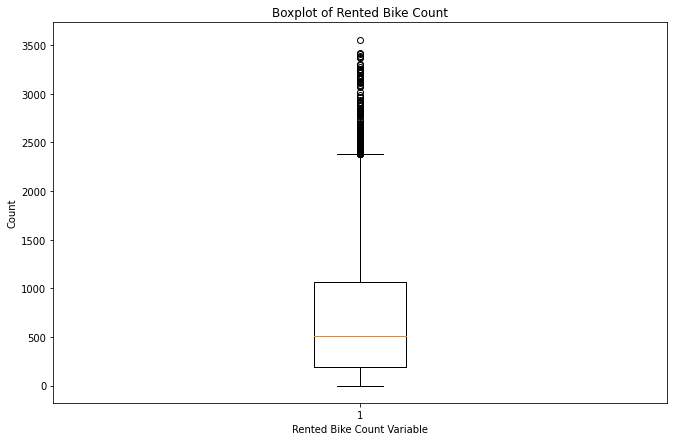

In [24]:
# Let's check outliers by using a boxplot

plt.figure(figsize = (11,7))
plt.boxplot(bike_df['Rented Bike Count'])
plt.xlabel('Rented Bike Count Variable')
plt.ylabel('Count')
plt.title('Boxplot of Rented Bike Count')
plt.show();

* **From above it can be seen that we do have outliers present in our dependent variable (after ~2500), we will deal with them in later part of the analysis.**

Skewness of the dv : 1.1534281773679014
Kurtosis of the dv : 0.8533869902003848




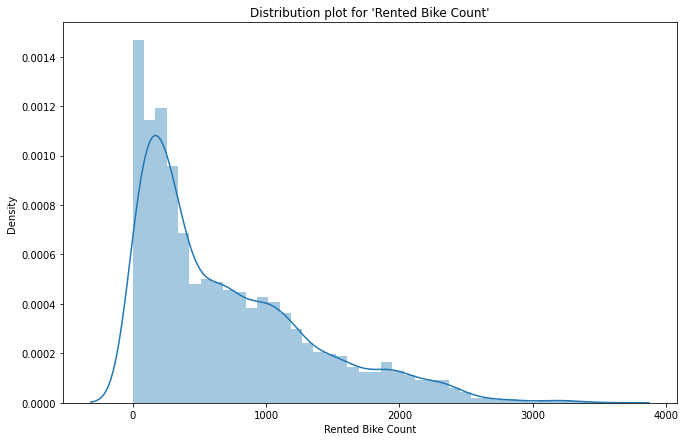

In [40]:
# Checking the skewness and kurtosis of dependent variable before transformation

print(f"Skewness of the dv : {bike_df['Rented Bike Count'].skew()}")
print(f"Kurtosis of the dv : {bike_df['Rented Bike Count'].kurt()}")
print('='*39)
print('\n')

# Let's visualize the distribution of dependent variable before transformation
plt.figure(figsize=(11,7))
sns.distplot(bike_df['Rented Bike Count'])
plt.title("Distribution plot for 'Rented Bike Count'")
plt.show();


* **It can be understood from above that Dependent Variable is positively skewed having value 1.153, and has kurtosis of 0.8533.**
 **Now let's do square root transformation of our dependent variable as it is moderately skewed, it will give us more clarification about data and we can visualize in a better way.**  

Skewness of the dv after transformation : 0.237362090985412
Kurtosis of the dv after transformation : -0.6572011997861553




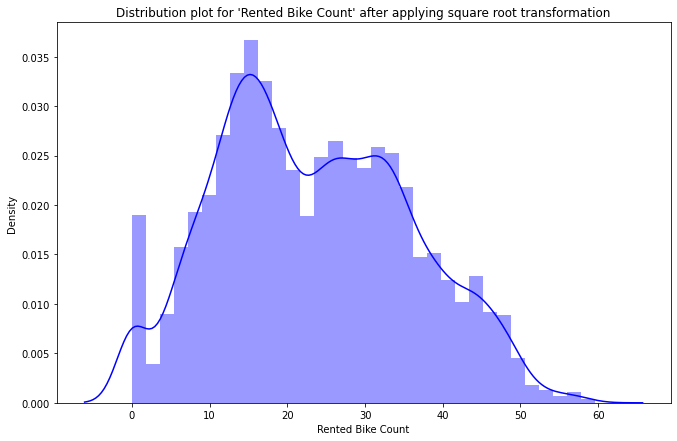

In [68]:
# Checking the skewness and kurtosis of dependent variable after transformation

print(f"Skewness of the dv after transformation : {np.sqrt(bike_df['Rented Bike Count']).skew()}")
print(f"Kurtosis of the dv after transformation : {np.sqrt(bike_df['Rented Bike Count']).kurt()}")
print('='*62)
print('\n')


# Let's visualize the distribution of dependent variable before transformation
plt.figure(figsize=(11,7))
sns.distplot(np.sqrt(bike_df['Rented Bike Count']),color='b')
plt.title("Distribution plot for 'Rented Bike Count' after applying square root transformation")
plt.show();



* **Great! as we can see our dependent variable is almost looking like normal distribution after applying square root transformation , now there is no need to remove outliers.**

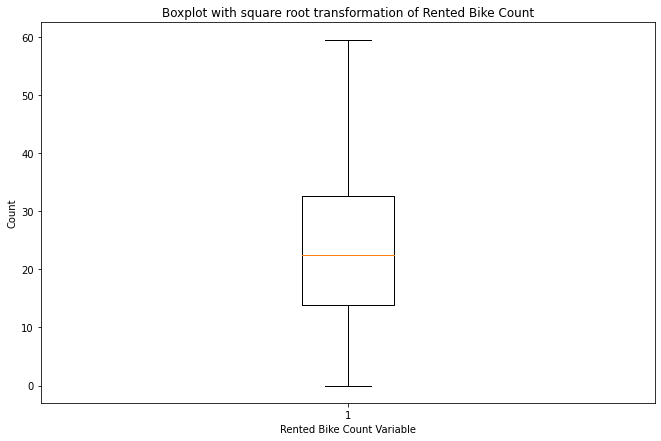

In [70]:
# We can visualize the box plot (with Square root transformation) 

plt.figure(figsize = (11,7))
plt.boxplot(np.sqrt(bike_df['Rented Bike Count']))
plt.xlabel('Rented Bike Count Variable')
plt.ylabel('Count')
plt.title('Boxplot with square root transformation of Rented Bike Count')
plt.show();

**2. Functioning Day**

In [73]:
# Lets check unique values of column 'Functioning Day'

print(f" Unique values for the column Functioning Day : {bike_df['Functioning Day'].unique()}")

 Unique values for the column Functioning Day : ['Yes' 'No']


**'Functioning Day' is a categorical variable with two values 'Yes' and 'No' , It tells us whether the day is a normal business day or not.**

In [75]:
# Let's find the count of yes ad no

print(bike_df['Functioning Day'].value_counts())

Yes    8465
No      295
Name: Functioning Day, dtype: int64


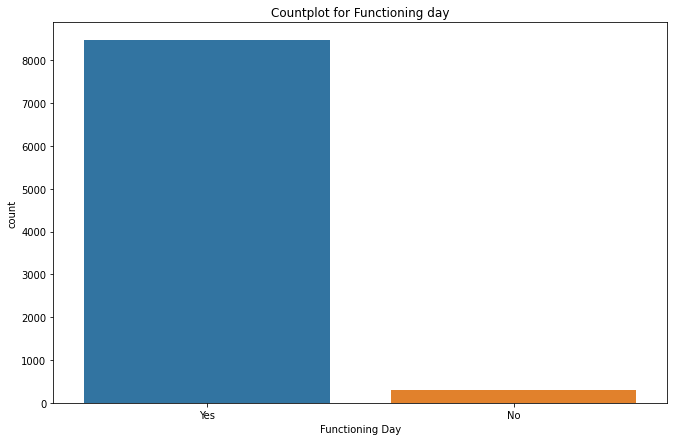

In [81]:
# Let's visualize the counts of 'Functioning Day'

plt.figure(figsize = (11,7))
sns.countplot( bike_df['Functioning Day'])
plt.title('Countplot for Functioning day')
plt.show();

* **As it can be seen from above that majority of the day are functioning day.**

**3. Holiday**

In [82]:
# Lets check unique values of column 'Holiday'

print(f" Unique values for the column Holiday : {bike_df['Holiday'].unique()}")

 Unique values for the column Holiday : ['No Holiday' 'Holiday']


**'Holiday' is a categorical variable with two values 'No Holiday' and 'Holiday'.**

In [84]:
# Let's find the count of 'No Holiday' and 'Holiday'

print(bike_df['Holiday'].value_counts())

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


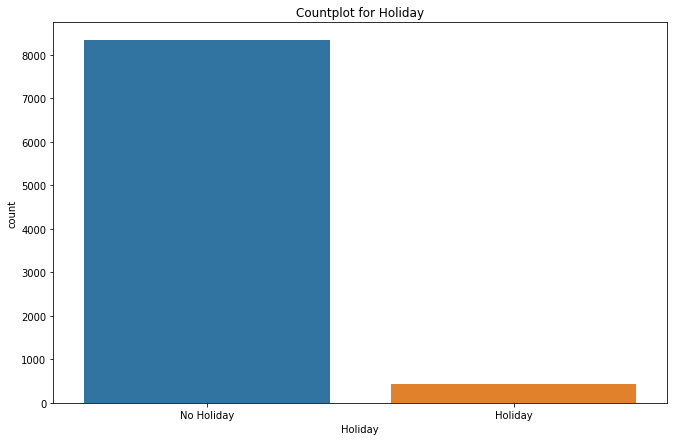

In [85]:
# Let's visualize the counts of 'Holiday'

plt.figure(figsize = (11,7))
sns.countplot( bike_df['Holiday'])
plt.title('Countplot for Holiday')
plt.show();

* **Now looks like we have a majority class here also , number of 'No holiday' is very high compare to 'holiday'.**

**4. Seasons**

In [87]:
# Lets check unique values of column 'Seasons'

print(f" Unique values for the column 'Seasons' : {bike_df['Seasons'].unique()}")

 Unique values for the column 'Seasons' : ['Winter' 'Spring' 'Summer' 'Autumn']


**'Seasons' is a categorical variable with four values 'Winter', 'Spring', 'Summer', 'Autumn'.**

In [88]:
# Let's find the count of each class in 'Seasons' column

print(bike_df['Seasons'].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


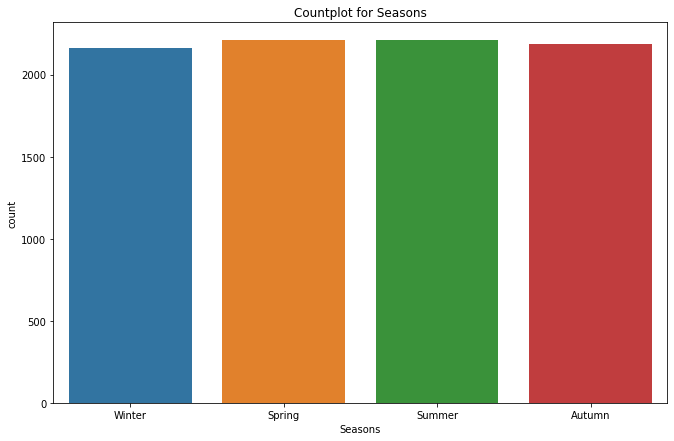

In [93]:
# Let's visualize the counts of 'Seasons'

plt.figure(figsize = (11,7))
sns.countplot( bike_df['Seasons'])
plt.title('Countplot for Seasons')
plt.show();

* **As it can be seen from above that every class has almost equal proportions.**